# Plot the MAG metadata

This notebook mkaes Fig. S2

In [1]:
import os
import sys
from socket import gethostname

# this is for ffmpeg
os.environ['PATH'] += os.pathsep + os.path.expanduser('~/miniconda3/envs/bioinformatics/bin')

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib

mag_metadata = cf_analysis_lib.read_mag_metadata()
mag_metadata

,MAG,CheckM,UID,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Redundancy,Strain heterogeneity,BV-BRC Mash,contigs,total size,BV-BRC Protein,GTDB
Bin Id,,,,,,,,,,,,,,,,,,,,
1,mag_1,k__Bacteria,(UID203),5449,104,58,28,30,31,14,1,0,62.27,31.07,3.8,Unknown,299,12081483,Mycobacterium,Njordarchaeia
2,mag_2,o__Burkholderiales,(UID4000),193,427,214,2,421,4,0,0,0,99.44,0.99,0.0,Achromobacter,123,6910862,Pseudomonas,Achromobacter
3,mag_3,o__Actinomycetales,(UID1809),267,400,222,2,386,12,0,0,0,99.40,1.63,50.0,Corynebacterium,48,2019611,Corynebacterium,Corynebacterium
4,mag_4,g__Staphylococcus,(UID298),56,805,176,26,754,25,0,0,0,98.71,1.28,36.0,Staphylococcus,136,2646744,Staphylococcus,Staphylococcus
5,mag_5,root,(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,Unknown,5,220351,Unclassified Bacteria,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70473,mag_70473,k__Bacteria,(UID203),5449,104,58,103,1,0,0,0,0,0.16,0.00,0.0,Unknown,11,24558,Unclassified,NaN
72938,mag_72938,root,(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,Unknown,9,20663,Streptococcus,NaN
75531,mag_75531,root,(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,Unknown,14,35089,Eubacterium,Unclassified


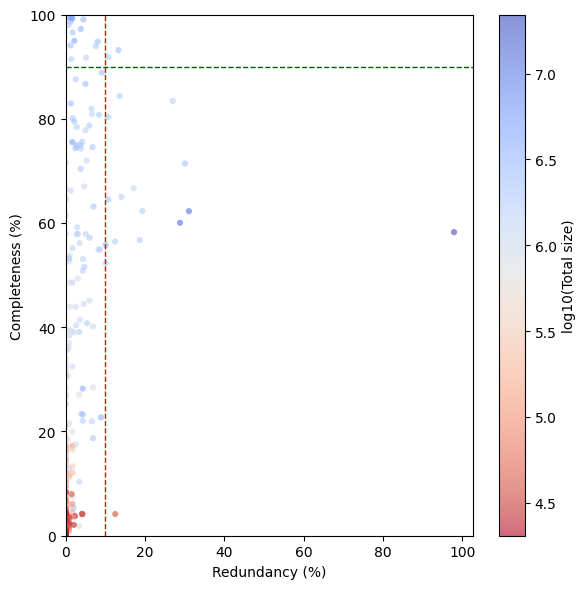

In [11]:

comp_col = 'Completeness'
red_col  = 'Redundancy'
size_col = 'total size'  # e.g. in bp or Mbp

# Drop rows with missing data in any of the three columns
sub = mag_metadata[[comp_col, red_col, size_col]].dropna()

# Thresholds for "good" bins/MAGs
comp_thr = 90       # high completeness
red_thr  = 10       # low redundancy
size_thr = 1e6      # large genomes (e.g. 2 Mbp if size is in bp)

# Mask for highlighted region
good = (
    (sub[comp_col] >= comp_thr) &
    (sub[red_col]  <= red_thr) &
    (sub[size_col] >= size_thr)
)

# Use log10(size) for colour scaling (handles wide ranges nicely)
log_size = np.log10(sub[size_col])

fig, ax = plt.subplots(figsize=(6, 6))

# Background points (all bins)
sc = ax.scatter(
    sub[red_col],
    sub[comp_col],
    c=log_size,
    s=20,
    alpha=0.6,
    cmap='coolwarm_r',
    edgecolor='none'
)

# Threshold lines
ax.axhline(comp_thr, color='darkgreen', linestyle='--', linewidth=1)
ax.axvline(red_thr,  color='red',       linestyle='--', linewidth=1)

# Axes formatting
ax.set_xlabel('Redundancy (%)')
ax.set_ylabel('Completeness (%)')
ax.set_xlim(left=0)     # if your redundancy is always ≥ 0
ax.set_ylim(0, 100)

# Colourbar for total size
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('log10(Total size)')


plt.tight_layout()
plt.savefig('final_images/figS2.png', dpi=300)
plt.savefig('final_images/figS2.svg')
plt.show()


In [17]:
print(f"We also assembled and annotated {mag_metadata.shape[0]:,} assembly bins (Supplementary Fig. 2; for this we included any assembled bins longer than {mag_metadata['total size'].min()} bp), including {sub[good].shape[0]} metagenome-assembled genome bins that are {comp_thr}% or more complete, {red_thr}% or less redundant, and more than {size_thr:,} bp long. (n = {sub.shape[0]:,})") 

We also assembled and annotated 3,215 assembly bins (Supplementary Fig. 2; for this we included any assembled bins longer than 20338 bp), including 15 metagenome-assembled genome bins that are 90% or more complete, 10% or less redundant, and more than 1,000,000.0 bp long. (n = 3,215)
